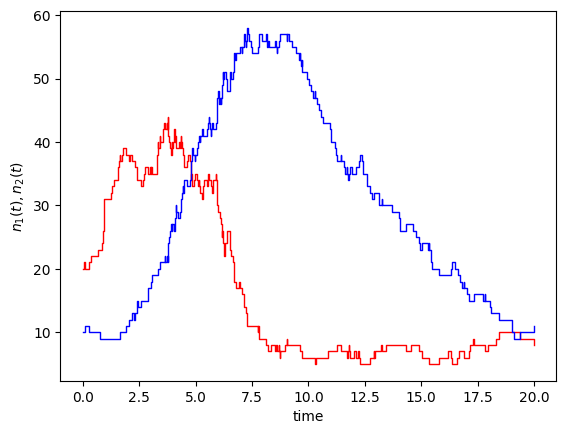

In [1]:
'''
  アルゴリズム4: ネクストリアクション法
  - Lotka-Volterra系
'''
import numpy as np
import matplotlib.pyplot as plt

# パラメータの設定
R = 3
c = [0.3, 0.01, 0.2]
# 状態に依存する関数(propensity function)の設定
gamma_r = [lambda n: c[0]*n[0],
             lambda n: c[1]*n[0]*n[1],
             lambda n: c[2]*n[1]]
# 各イベントでの状態遷移の設定
v_e = np.array([[+1, 0],
                 [-1,+1],
                 [ 0,-1]])

# 乱数の種の設定
rng = np.random.default_rng(67362)

# シミュレーションの初期設定（アルゴリズム4 1行目）
n_ini = [20, 10]
T = 20
t = 0.0
n_tilde = n_ini

# 結果を格納するための変数
result_time = []
result_n_tilde = []
result_time.append(t)
result_n_tilde.append(n_tilde)

gamma_tilde_r = np.zeros(R)
gamma_tilde_r_prime = np.zeros(R)
t_r = np.zeros(R)
for r, gamma in  enumerate(gamma_r):
    gamma_tilde_r[r] = gamma(n_tilde) # アルゴリズム4 3行目
    t_r[r] = rng.exponential(1.0/gamma_tilde_r[r]) # アルゴリズム4 4行目
    # 注意： 使用している乱数生成のライブラリの仕様のため、パラメータの逆数を利用

while 1: # アルゴリズム4 6行目
    e = np.argmin(t_r) # アルゴリズム4 7行目
    if np.all(t_r[e] > T): # アルゴリズム4 8行目
        break
    t = t_r[e] # アルゴリズム4 11行目
    result_time.append(t) # イベント発生時刻の保存（描画のため）
    result_n_tilde.append(n_tilde) # 個数の保存（描画のため）
    n_tilde = n_tilde + v_e[e] # アルゴリズム4 12行目
    for r, gamma in enumerate(gamma_r): # アルゴリズム4 13行目
        gamma_tilde_r_prime[r] = gamma(n_tilde) # アルゴリズム4 14行目
    for r in range(R): # アルゴリズム4 16行目
        if r == e:
            continue
        # アルゴリズム4 17行目
        t_r[r] = (gamma_tilde_r[r]/gamma_tilde_r_prime[r])*(t_r[r]-t_r[e]) + t_r[e]
    # アルゴリズム4 19行目
    t_r[e] = rng.exponential(1.0/gamma_tilde_r_prime[e]) + t_r[e]
    for r in range(R): # アルゴリズム4 20行目
        gamma_tilde_r[r] = gamma_tilde_r_prime[r] # アルゴリズム4 21行目
    result_time.append(t) # イベント発生時刻の保存（描画のため）
    result_n_tilde.append(n_tilde) # イベント発生時刻の保存（描画のため）
    # 種2がなくなると種1が増え続けるだけなので終了させる
    if np.all(n_tilde[1] == 0):
        break

# プロット： 下のコードは状態変数が2つの場合のみに対応
result_time = np.array(result_time)
result_n = np.array(result_n_tilde).T
plt.plot(result_time, result_n[0], 'r', linewidth=1)
plt.plot(result_time, result_n[1], 'b', linewidth=1)
plt.xlabel('time')
plt.ylabel('$n_1(t), n_2(t)$')
plt.show()

